### 라이브러리 참조

In [3]:
# =========================
# 기본 라이브러리
# =========================

from hossam import *


import pandas as pd
import numpy as np
from pandas import DataFrame, Series, concat, merge
from matplotlib import pyplot as plt
import seaborn as sb
from pandas import read_csv
# =========================
# Scikit-learn 공통
# =========================
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# =========================
# 분류 모델
# =========================
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# =========================
# 회귀 모델 (필요 시)
# =========================
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# =========================
# 성능 평가 지표 (분류)
# =========================
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    recall_score,
    precision_score,
    f1_score,
    log_loss,
)

# =========================
# 성능 평가 지표 (회귀)
# =========================
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
)

# =========================
# 기타
# =========================
from itertools import product
from scipy.spatial import ConvexHull
import shap

# VIF값을 계산하기 위한 참조
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [4]:
origin = read_csv(r'C:\itwill_bigdata_final_project-main\itwill_bigdata_final_project\1. 초기 데이터 전처리\3.coding_book_mapping.csv',encoding='utf-8')


origin.head()

,w09_fam1,w09_fam2,w09hhsize,w09edu,w09gender1,w09a002_age,w09marital,w09year2,w09edu_s,w09ecoact_s,w09enu_type,w09ba003,w09livewithnm,w09ba069,w09bp1,w09c152,w09c001,w09c003,w09c005,w09chronic_a,w09chronic_b,w09chronic_c,w09chronic_d,w09chronic_e,w09chronic_f,w09chronic_g,w09chronic_h,w09chronic_i,w09chronic_j,w09chronic_k,w09chronic_l,w09chronic_m,w09c056,w09c068,w09c081,w09c082,w09c085,w09c102,w09bmi,w09c108,w09c111,w09smoke,w09alc,w09addic,w09c318,w09c330,w09c333,w09c334,w09c337,w09c340,w09adl,w09c550,w09mgrip,w09fromchildren,w09tochildren,w09transferfrom,w09transferto,w09earned,w09pinc,w09e201,w09e207,w09e213,w09e219,w09e225,w09e231,w09e237,w09e243,w09e273,w09e251,w09passets,w09pliabilities,w09pnetassets,w09f001type,w09hhinc,w09hhassets,w09hhliabilities,w09hhnetassets,w09g032,w09g026,w09g027,w09g028,w09g029,w09g030,w09g031,w09cadd_19,w09c142,w09c143,w09c144,w09c145,w09c146,w09c147,w09c148,w09c149,w09c150,w09c151,dependent_ecotype,dependent_wage_work,work_ability_age
0,1세대,부부,2,대졸이상,여,67.000,혼인중,1954.000,대졸이상,취업,1,2,NaN,아니오,두분 모두 사망 혹은 안 계심 (실종),보통,좋은 편,아니오,그렇지 않은 편이다,아니오,예,아니오,아니오,아니오,아니오,아니오,아니오,예,NaN,아니오,아니오,NaN,아니오,NaN,아니오,아니오,아니오,아니오,24.030,1,5.000,비흡연자,비음주자,NaN,0.000,0.000,0.000,0.000,2.000,0.000,0,예,21.500,15.000,NaN,15.000,NaN,NaN,375.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35500.000,NaN,35500.000,전세,13000.000,30000.000,10000.000,20000.000,20.000,70.000,60.000,70.000,70.000,80.000,중의 상,아니오,하루 미만,하루 미만,하루 미만,하루 미만,3-4일,하루 미만,하루 미만,하루 미만,5-7일,하루 미만,0,0,NaN
1,1세대,부부,2,대졸이상,남,68.000,혼인중,1955.000,대졸이상,비경활,1,2,NaN,아니오,두분 모두 사망 혹은 안 계심 (실종),보통,좋은 편,아니오,그런 편이다,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,예,아니오,아니오,NaN,아니오,NaN,아니오,아니오,아니오,아니오,21.470,1,5.000,과거흡연자,현재음주자,정상,0.000,0.000,0.000,0.000,4.000,0.000,0,아니오,NaN,15.000,NaN,15.000,NaN,2400.000,2415.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,전세,13000.000,30000.000,10000.000,20000.000,20.000,70.000,70.000,70.000,NaN,60.000,중의 상,아니오,하루 미만,하루 미만,하루 미만,하루 미만,5-7일,하루 미만,하루 미만,3-4일,하루 미만,하루 미만,1,1,30.000
2,1세대,부부,2,초졸이하,남,80.000,혼인중,1946.000,초졸이하,비경활,1,2,NaN,아니오,두분 모두 사망 혹은 안 계심 (실종),좋은 편,매우 좋음,아니오,그렇지 않은 편이다,예,예,아니오,아니오,아니오,아니오,아니오,아니오,예,아니오,아니오,아니오,NaN,아니오,NaN,아니오,아니오,아니오,아니오,21.970,1,7.000,과거흡연자,과거음주자,NaN,0.000,0.000,0.000,0.000,6.000,0.000,0,예,31.500,175.000,50.000,175.000,50.000,NaN,10663.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000.000,10000.000,20000.000,자기집,11200.000,33000.000,10000.000,23000.000,10.000,70.000,60.000,40.000,NaN,60.000,중의 하,아니오,하루 미만,하루 이틀,하루 이틀,하루 이틀,3-4일,하루 이틀,하루 미만,3-4일,하루 이틀,하루 미만,0,0,NaN
3,1세대,부부,2,초졸이하,여,76.000,혼인중,1942.000,초졸이하,비경활,1,2,NaN,아니오,두분 모두 사망 혹은 안 계심 (실종),보통,좋은 편,아니오,그렇지 않은 편이다,예,예,아니오,아니오,아니오,아니오,아니오,아니오,예,NaN,아니오,아니오,NaN,아니오,아니오,아니오,아니오,예,예,21.480,1,5.000,비흡연자,과거음주자,NaN,0.000,0.000,0.000,0.000,6.000,0.000,0,예,19.250,175.000,50.000,175.000,50.000,NaN,823.000,100.000,50.000,5.000,0.000,0.000,13.000,15.000,5.000,0.000,0.000,10200.000,10000.000,200.000,자기집,11200.000,33000.000,10000.000,23000.000,20.000,70.000,60.000,30.000,80.000,60.000,중의 하,아니오,하루 미만,하루 이틀,하루 미만,하루 이틀,3-4일,하루 미만,하루 미만,3-4일,하루 이틀,하루 미만,0,0,NaN
4,1세대,단독가구,1,초졸이하,여,78.000,사별 또는 실종 (이산가족),NaN,NaN,NaN,1,3,NaN,아니오,두분 모두 사망 혹은 안 계심 (실종),보통,좋은 편,아니오,전혀 그렇지 않다,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,NaN,아니오,아니오,NaN,아니오,NaN,아니오,아니오,예,예,22.010,1,5.000,비흡연자,비음주자,NaN,0.000,0.000,0.000,0.000,6.000,0.000,0,예,17.000,170.000,NaN,170.000,NaN,NaN,710.000,100.000,40.000,5.000,0.000,0.000,10.000,5.000,5.000,5.000,20.000,15000.000,10000.000,5000.000,자기집,11300.000,16000.000,10000.000,6000.000,10.000,60.000,60.000,NaN,70.000,70.000,하의 상,아니오,하루 미만,하루 이틀,하루 이틀,하루 미만,3-4일,하루 이틀,3-4일,3-4일,하루 이틀,하루 이틀,0,0,NaN


In [5]:
# =========================
# 지정한 "명목형" 컬럼 리스트
# =========================
categorical_cols = [
    'w09_fam1','w09_fam2','w09edu','w09gender1','w09marital','w09edu_s','w09ecoact_s','w09enu_type',
    'w09ba069','w09bp1','w09c152','w09c001','w09c003','w09c005',
    'w09chronic_a','w09chronic_b','w09chronic_c','w09chronic_d','w09chronic_e','w09chronic_f',
    'w09chronic_g','w09chronic_h','w09chronic_i','w09chronic_j','w09chronic_k','w09chronic_l','w09chronic_m',
    'w09c056','w09c068','w09c081','w09c082','w09c085','w09c102',
    'w09smoke','w09alc','w09addic','w09c550',
    'w09f001type','w09g031',
    'w09cadd_19','w09c142','w09c143','w09c144','w09c145','w09c146','w09c147','w09c148','w09c149','w09c150','w09c151'
]


# 종속변수인 'dependent_ecotype','dependent_wage_work' 일부러 제외


### 명목형 데이터 category 로 변경 > dtype_df

In [6]:
# 1) 복사
origin_type_changed = origin.copy()

# 2) (안전장치) 실제 존재하는 컬럼만 추리기
cat_cols = [c for c in categorical_cols if c in origin_type_changed.columns]

# 3) category로 변환
origin_type_changed[cat_cols] = origin_type_changed[cat_cols].astype("category")

# 4) 확인 (괄호 X)
dtype_df = origin_type_changed.dtypes.reset_index()
dtype_df.columns = ['column_name', 'dtype']

pd.set_option('display.max_rows', None)
display(dtype_df)


,column_name,dtype
0,w09_fam1,category
1,w09_fam2,category
2,w09hhsize,int64
3,w09edu,category
4,w09gender1,category
5,w09a002_age,float64
6,w09marital,category
7,w09year2,float64
8,w09edu_s,category
9,w09ecoact_s,category


## 필요한 함수 정의
#### 성능 평가 함수

In [7]:
def hs_get_scores(estimator, x_test, y_true):
    if hasattr(estimator, "named_steps"):
        classname = estimator.named_steps["model"].__class__.__name__
    else:
        classname = estimator.__class__.__name__

    y_pred = estimator.predict(x_test)

    return DataFrame(
        {
            "결정계수(R2)": r2_score(y_true, y_pred),
            "평균절대오차(MAE)": mean_absolute_error(y_true, y_pred),
            "평균제곱오차(MSE)": mean_squared_error(y_true, y_pred),
            "평균오차(RMSE)": np.sqrt(mean_squared_error(y_true, y_pred)),
            "평균 절대 백분오차 비율(MAPE)": mean_absolute_percentage_error(
                y_true, y_pred
            ),
            "평균 비율 오차(MPE)": np.mean((y_true - y_pred) / y_true * 100),
        },
        index=[classname],
    )

### 데이터 품질 확인 함수 정의

In [8]:
import numpy as np
from pandas import DataFrame, concat

def hs_describe(data, columns=None):
    num_columns = list(data.select_dtypes(include=np.number).columns)

    if not columns:
        columns = num_columns

    # 기술통계량 구하기
    desc = data[columns].describe().T

    # 각 컬럼별 결측치 수 (na_count) 추가
    na_counts = data[columns].isnull().sum()
    desc.insert(1, 'na_count', na_counts)

    # 결측치 비율 (na_rate) 추가
    desc.insert(2, 'na_rate', (na_counts / len(data)) * 100)

    # 추가 통계량 계산
    additional_stats = []

    for f in columns:
        # 숫자 타입이 아니라면 건너뜀
        if f not in num_columns:
            continue

        # 사분위수
        q1 = data[f].quantile(q=0.25)
        q3 = data[f].quantile(q=0.75)

        # 이상치 경계 (Tukey's fences)
        iqr = q3 - q1
        down = q1 - 1.5 * iqr
        up = q3 + 1.5 * iqr

        # 왜도
        skew = data[f].skew()

        # 이상치 개수 및 비율
        outlier_count = ((data[f] < down) | (data[f] > up)).sum()
        outlier_rate = (outlier_count / len(data)) * 100

        # 분포 특성 판정 (왜도 기준)
        abs_skew = abs(skew)
        if abs_skew < 0.5:
            dist = "거의 대칭"
        elif abs_skew < 1.0:
            if skew > 0:
                dist = "약한 우측 꼬리"
            else:
                dist = "약한 좌측 꼬리"
        elif abs_skew < 2.0:
            if skew > 0:
                dist = "중간 우측 꼬리"
            else:
                dist = "중간 좌측 꼬리"
        else:
            if skew > 0:
                dist = "극단 우측 꼬리"
            else:
                dist = "극단 좌측 꼬리"

        # 로그변환 필요성 판정
        if abs_skew < 0.5:
            log_need = "낮음"
        elif abs_skew < 1.0:
            log_need = "중간"
        else:
            log_need = "높음"

        additional_stats.append({
            'field': f,
            'iqr': iqr,
            'up': up,
            'down': down,
            'outlier_count': outlier_count,
            'outlier_rate': outlier_rate,
            'skew': skew,
            'dist': dist,
            'log_need': log_need
        })

    additional_df = DataFrame(additional_stats).set_index('field')

    # 결과 병합
    result = concat([desc, additional_df], axis=1)

    return result


### 범주형 변수 확인용

In [9]:

def category_describe(data, columns=None):
    num_columns = data.select_dtypes(include=np.number).columns

    if not columns:
        # 명목형(범주형) 컬럼 선택: object, category, bool 타입
        columns = data.select_dtypes(
            include=['object', 'category', 'bool']
        ).columns  # type: ignore

    result = []
    summary = []

    for f in columns:
        # 숫자형 컬럼은 건너뜀
        if f in num_columns:
            continue

        # 각 범주값의 빈도수 계산 (NaN 포함)
        value_counts = data[f].value_counts(dropna=False)

        # 범주별 빈도/비율 정보 추가 (category_table 기능)
        for category, count in value_counts.items():
            rate = (count / len(data)) * 100
            result.append({
                "변수": f,
                "범주": category,
                "빈도": count,
                "비율(%)": round(rate, 2)
            })

        if len(value_counts) == 0:
            continue

        # 최대/최소 범주 정보 추가 (category_describe 기능)
        max_category = value_counts.index[0]
        max_count = value_counts.iloc[0]
        max_rate = (max_count / len(data)) * 100

        min_category = value_counts.index[-1]
        min_count = value_counts.iloc[-1]
        min_rate = (min_count / len(data)) * 100

        summary.append({
            "변수": f,
            "최대_범주": max_category,
            "최대_비율(%)": round(max_rate, 2),
            "최소_범주": min_category,
            "최소_비율(%)": round(min_rate, 2)
        })

    return DataFrame(result), DataFrame(summary).set_index("변수")


#### 변수 중요도 확인

In [10]:
from sklearn.inspection import permutation_importance

def hs_feature_importance(model, x, y):
    perm = permutation_importance(
        estimator=model,
        X=x,
        y=y,
        scoring="r2",
        n_repeats=30,
        random_state=42,
        n_jobs=-1,
    )

    # 결과 정리
    perm_df = DataFrame(
        {
            "importance_mean": perm.importances_mean,
            "importance_std": perm.importances_std,
        },
        index=x.columns,
    ).sort_values("importance_mean", ascending=False)

    # 시각화
    df = perm_df.sort_values(by="importance_mean", ascending=False)

    figsize = (1280 / my_dpi, 600 / my_dpi)
    fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=my_dpi)

    sb.barplot(data=df, x="importance_mean", y=df.index)

    ax.set_title("Permutation Importance")
    ax.set_xlabel("Permutation Importance (mean)")
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
    plt.close()

    return perm_df


#### 과적합 판정 함수

In [11]:
import matplotlib.pyplot as plt

my_dpi = 100  # 없으면 기본값

def create_figure(figsize=(1280/100, 720/100), dpi=None):
    if dpi is None:
        dpi = my_dpi
    fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=dpi)
    return fig, ax

def finalize_plot(ax):
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    plt.close()


In [12]:
def hs_learning_cv(
    estimator, x, y, scoring="neg_root_mean_squared_error",
    cv=5, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
):

    train_sizes, train_scores, cv_scores = learning_curve(  # type: ignore
        estimator=estimator,
        X=x,
        y=y,
        train_sizes=train_sizes,
        cv=cv,
        scoring=scoring,
        n_jobs=n_jobs,
        shuffle=True,
        random_state=52,
    )

    if hasattr(estimator, "named_steps"):
        classname = estimator.named_steps["model"].__class__.__name__
    else:
        classname = estimator.__class__.__name__

    # neg RMSE -> RMSE
    train_rmse = -train_scores
    cv_rmse = -cv_scores

    # 평균 / 표준편차
    train_mean = train_rmse.mean(axis=1)
    cv_mean = cv_rmse.mean(axis=1)
    cv_std = cv_rmse.std(axis=1)

    # 마지막 지점 기준 정량 판정
    final_train = train_mean[-1]
    final_cv = cv_mean[-1]
    final_std = cv_std[-1]

    gap_ratio = final_train / final_cv
    var_ratio = final_std / final_cv

    # -------------------------
    # 과소적합 기준선 (some_threshold)
    # -------------------------

    # 기준모형 RMSE (평균 예측)
    y_mean = y.mean()
    rmse_naive = np.sqrt(np.mean((y - y_mean) ** 2))

    # 분산 기반
    std_y = y.std()

    # 최소 설명력(R2) 기반
    min_r2 = 0.10
    rmse_r2 = np.sqrt((1 - min_r2) * np.var(y))

    # 최종 threshold (가장 관대한 기준)
    # → 원래 some_threshold는 도메인 지식 수준에서 이 모델은 최소 어느 정도의 성능은 내야 한다는 기준을 설정하는 것
    some_threshold = min(rmse_naive, std_y, rmse_r2)

    # -------------------------
    # 판정 로직
    # -------------------------
    if gap_ratio >= 0.95 and final_cv > some_threshold:
        status = "⚠️ 과소적합 (bias 큼)"
    elif gap_ratio <= 0.8:
        status = "⚠️ 과대적합 (variance 큼)"
    elif gap_ratio <= 0.95 and var_ratio <= 0.10:
        status = "✅ 일반화 양호"
    elif var_ratio > 0.15:
        status = "⚠️ 데이터 부족 / 분산 큼"
    else:
        status = "⚠️ 판단 유보"

    # -------------------------
    # 정량 결과 표
    # -------------------------
    result_df = DataFrame(
        {
            "Train RMSE": [final_train],
            "CV RMSE 평균": [final_cv],
            "CV RMSE 표준편차": [final_std],
            "Train/CV 비율": [gap_ratio],
            "CV 변동성 비율": [var_ratio],
            "판정 결과": [status],
        },
        index=[classname],
    )

    # display(result_df)

    # -------------------------
    # 학습곡선 시각화
    # -------------------------

    fig, ax = create_figure()

    sb.lineplot(
        x=train_sizes,
        y=train_mean,
        marker="o",
        markeredgecolor="#ffffff",
        label="Train RMSE",
    )

    sb.lineplot(
        x=train_sizes,
        y=cv_mean,
        marker="o",
        markeredgecolor="#ffffff",
        label="Train RMSE",
    )

    ax.set_xlabel("RMSE", fontsize=8, labelpad=5)  # type: ignore
    ax.set_ylabel("학습곡선 (Learning Curve)", fontsize=8, labelpad=5)  # type: ignore
    ax.grid(True, alpha=0.3)  # type: ignore

    finalize_plot(ax)

    return result_df


#### 성능평가 + 과적합 판정 동시 수행 함수

In [13]:
def hs_get_score_cv(
    estimator,
    x_test,
    y_test,
    x_origin,
    y_origin,
    scoring="neg_root_mean_squared_error",
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1,
):

    score_df = hs_get_scores(estimator, x_test, y_test)

    cv_df = hs_learning_cv(
        estimator,
        x_origin,
        y_origin,
        scoring=scoring,
        cv=cv,
        train_sizes=train_sizes,
        n_jobs=n_jobs,
    )

    return merge(score_df, cv_df, left_index=True, right_index=True)


#### SHAP 분석

In [14]:
def hs_shap_analysis(
    model,
    x: DataFrame,
    plot: bool = True,
    width: int = 1600,
    height: int = 800,
):
    # -------------------------------------------------
    # 1. SHAP Explainer 생성 (트리 모델용)
    # -------------------------------------------------
    explainer = shap.TreeExplainer(model)

    # -------------------------------------------------
    # 2. SHAP 값 계산
    # shape = (n_samples, n_features)
    # -------------------------------------------------
    shap_values = explainer.shap_values(x)

    # -------------------------------------------------
    # 3. SHAP DataFrame 변환
    # -------------------------------------------------
    shap_df = DataFrame(
        shap_values,
        columns=x.columns,
        index=x.index,
    )

    # -------------------------------------------------
    # 4. SHAP 요약 통계
    # -------------------------------------------------
    summary_df = DataFrame(
        {
            "feature": shap_df.columns,
            "mean_abs_shap": shap_df.abs().mean().values,
            "mean_shap": shap_df.mean().values,
            "std_shap": shap_df.std().values,
        }
    )

    # -------------------------------------------------
    # 5. 영향 방향 (보수적 기준)
    # -------------------------------------------------
    summary_df["direction"] = np.where(
        summary_df["mean_shap"] > 0,
        "양(+) 경향",
        np.where(summary_df["mean_shap"] < 0, "음(-) 경향", "혼합/미약"),
    )

    # -------------------------------------------------
    # 6. 변동성 지표 (안정성 판단)
    # -------------------------------------------------
    summary_df["cv"] = (
        summary_df["std_shap"] / (summary_df["mean_abs_shap"] + 1e-9)
    )

    summary_df["variability"] = np.where(
        summary_df["cv"] < 1,
        "stable",      # 평균 대비 변동성 낮음
        "variable",    # 상황 의존적 영향
    )

    # -------------------------------------------------
    # 7. 중요도 기준 정렬
    # -------------------------------------------------
    summary_df = (
        summary_df
        .sort_values("mean_abs_shap", ascending=False)
        .reset_index(drop=True)
    )

    # -------------------------------------------------
    # 8. 중요 변수 판별 (누적 80%)
    # -------------------------------------------------
    total_importance = summary_df["mean_abs_shap"].sum()

    summary_df["importance_ratio"] = (
        summary_df["mean_abs_shap"] / total_importance
    )

    summary_df["importance_cumsum"] = (
        summary_df["importance_ratio"].cumsum()
    )

    summary_df["is_important"] = np.where(
        summary_df["importance_cumsum"] <= 0.80,
        "core",        # 핵심 변수
        "secondary",   # 보조 변수
    )

    # -------------------------------------------------
    # 9. SHAP Summary Plot
    # -------------------------------------------------
    if plot:
        shap.summary_plot(shap_values, x, show=False)

        fig = plt.gcf()
        fig.set_size_inches(width / 100, height / 100)

        plt.title("SHAP Summary Plot", fontsize=10, pad=10)
        plt.xlabel("SHAP value", fontsize=8)
        plt.xticks(fontsize=6)
        plt.yticks(fontsize=8)
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()
        plt.close()

    # -------------------------------------------------
    return summary_df, shap_values


#### SHAP dependance

In [15]:
def hs_shap_dependence_analysis(
    summary_df: DataFrame,
    shap_values,
    x_train: DataFrame,
    include_secondary: bool = False, #core 변수가 너무 적을 때, True 로 설정하면 secondary 까지 포함
    width: int = 1600,
    height: int = 800,
):
    # 1. 주 대상 변수 (Core + Variable)
    main_features = summary_df[
        (summary_df["is_important"] == "core")
        & (summary_df["variability"] == "variable")
    ]["feature"].tolist()

    # 2. 상호작용 후보 변수
    interaction_features = summary_df[
        summary_df["is_important"] == "core"
    ]["feature"].tolist()

    if include_secondary and len(interaction_features) < 2:
        interaction_features.extend(
            summary_df[summary_df["is_important"] == "secondary"]["feature"].tolist()
        )

    # 3. 변수 쌍 생성 (자기 자신 제외)
    pairs = []
    for f in main_features:
        for inter in interaction_features:
            # 자기 자신과의 조합은 제외
            if f != inter:
                pairs.append((f, inter))

    # 중요도 순 정렬 (주 변수 기준)
    importance_rank = {}
    for i, row in summary_df.iterrows():
        importance_rank[row["feature"]] = i

    pairs = sorted(
        pairs,
        key=lambda x: importance_rank.get(x[0], 999),
    )

    # 4. dependence plot 일괄 생성
    for feature_name, interaction_name in pairs:
        shap.dependence_plot(
            feature_name,
            shap_values,
            x_train,
            interaction_index=interaction_name,
            show=False,
        )

        # SHAP figure 직접 제어
        fig = plt.gcf()
        fig.set_size_inches(width / my_dpi, height / my_dpi)

        plt.title(
            f"SHAP Dependence Plot: {feature_name} × {interaction_name}",
            fontsize=10,
            pad=10,
        )

        plt.xlabel(feature_name, fontsize=10)
        plt.ylabel(f"SHAP value for {feature_name}", fontsize=10)

        plt.xticks(fontsize=6)
        plt.yticks(fontsize=8)
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()
        plt.close()

    return pairs


### [2] 데이터 불러오기 + 인덱스 설정 + 카테고리 타입 지정

In [16]:
origin = origin_type_changed.copy()
origin.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6057 entries, 0 to 6056
Data columns (total 98 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   w09_fam1             6057 non-null   category
 1   w09_fam2             6057 non-null   category
 2   w09hhsize            6057 non-null   int64   
 3   w09edu               6057 non-null   category
 4   w09gender1           6057 non-null   category
 5   w09a002_age          6052 non-null   float64 
 6   w09marital           6057 non-null   category
 7   w09year2             4413 non-null   float64 
 8   w09edu_s             4292 non-null   category
 9   w09ecoact_s          4323 non-null   category
 10  w09enu_type          6057 non-null   category
 11  w09ba003             6057 non-null   int64   
 12  w09livewithnm        1132 non-null   float64 
 13  w09ba069             6057 non-null   category
 14  w09bp1               6057 non-null   category
 15  w09c152              

## #01. 데이터 가져오기

In [17]:
origin = origin_type_changed.copy()
origin.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6057 entries, 0 to 6056
Data columns (total 98 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   w09_fam1             6057 non-null   category
 1   w09_fam2             6057 non-null   category
 2   w09hhsize            6057 non-null   int64   
 3   w09edu               6057 non-null   category
 4   w09gender1           6057 non-null   category
 5   w09a002_age          6052 non-null   float64 
 6   w09marital           6057 non-null   category
 7   w09year2             4413 non-null   float64 
 8   w09edu_s             4292 non-null   category
 9   w09ecoact_s          4323 non-null   category
 10  w09enu_type          6057 non-null   category
 11  w09ba003             6057 non-null   int64   
 12  w09livewithnm        1132 non-null   float64 
 13  w09ba069             6057 non-null   category
 14  w09bp1               6057 non-null   category
 15  w09c152              

### dependent_wage_work 종속변수 제외

In [18]:
origin2 = origin.drop(['dependent_wage_work'], axis=1)
origin2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6057 entries, 0 to 6056
Data columns (total 97 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   w09_fam1           6057 non-null   category
 1   w09_fam2           6057 non-null   category
 2   w09hhsize          6057 non-null   int64   
 3   w09edu             6057 non-null   category
 4   w09gender1         6057 non-null   category
 5   w09a002_age        6052 non-null   float64 
 6   w09marital         6057 non-null   category
 7   w09year2           4413 non-null   float64 
 8   w09edu_s           4292 non-null   category
 9   w09ecoact_s        4323 non-null   category
 10  w09enu_type        6057 non-null   category
 11  w09ba003           6057 non-null   int64   
 12  w09livewithnm      1132 non-null   float64 
 13  w09ba069           6057 non-null   category
 14  w09bp1             6057 non-null   category
 15  w09c152            6057 non-null   category
 16  w09c00

## #02. 데이터 품질 확인
### [1] 연속형 데이터 확인


In [19]:
# 혹시 리스트에 있는데 origin2에 없는 컬럼이 있으면 에러 날 수 있으니 안전하게 교집합만 제외
drop_cols = [c for c in categorical_cols if c in origin2.columns]

origin2_num = origin2.drop(columns=drop_cols)

hs_describe(origin2_num)


,count,na_count,na_rate,mean,std,min,25%,50%,75%,max,iqr,up,down,outlier_count,outlier_rate,skew,dist,log_need
w09hhsize,6057.000,0,0.000,2.197,0.960,1.000,2.000,2.000,2.000,8.000,0.000,2.000,2.000,2643,43.635,1.456,중간 우측 꼬리,높음
w09a002_age,6052.000,5,0.083,72.299,9.224,59.000,64.000,71.000,80.000,103.000,16.000,104.000,40.000,0,0.000,0.373,거의 대칭,낮음
w09year2,4413.000,1644,27.142,1951.779,8.601,1903.000,1946.000,1953.000,1959.000,1975.000,13.000,1978.500,1926.500,7,0.116,-0.469,거의 대칭,낮음
w09ba003,6057.000,0,0.000,2.656,1.275,0.000,2.000,2.000,3.000,9.000,1.000,4.500,0.500,690,11.392,1.019,중간 우측 꼬리,높음
w09livewithnm,1132.000,4925,81.311,1.332,0.560,1.000,1.000,1.000,2.000,5.000,1.000,3.500,-0.500,4,0.066,1.775,중간 우측 꼬리,높음
w09bmi,6015.000,42,0.693,23.494,2.644,12.110,21.800,23.390,25.000,43.280,3.200,29.800,17.000,129,2.130,0.342,거의 대칭,낮음
w09c108,6057.000,0,0.000,3.126,1.996,1.000,1.000,5.000,5.000,5.000,4.000,11.000,-5.000,0,0.000,-0.127,거의 대칭,낮음
w09c111,2837.000,3220,53.162,4.602,2.039,1.000,3.000,5.000,6.000,60.000,3.000,10.500,-1.500,1,0.017,6.974,극단 우측 꼬리,높음
w09c318,6053.000,4,0.066,0.109,0.423,0.000,0.000,0.000,0.000,10.000,0.000,0.000,0.000,529,8.734,7.933,극단 우측 꼬리,높음
w09c330,6054.000,3,0.050,1.355,3.326,0.000,0.000,0.000,1.000,50.000,1.000,2.500,-1.500,1040,17.170,4.270,극단 우측 꼬리,높음


### 명목형 변수 품질 확인

In [20]:
cols = [c for c in categorical_cols if c in origin2.columns]
a, b = category_describe(origin2, columns=cols)
display(a)
display(b)


,변수,범주,빈도,비율(%)
0,w09_fam1,1세대,4212,69.540
1,w09_fam1,2세대,1592,26.280
2,w09_fam1,3세대,238,3.930
3,w09_fam1,4세대,14,0.230
4,w09_fam1,기타,1,0.020
5,w09_fam2,부부,3057,50.470
6,w09_fam2,2세대,1575,26.000
7,w09_fam2,단독가구,1138,18.790
8,w09_fam2,3세대,238,3.930
9,w09_fam2,조손,17,0.280


,최대_범주,최대_비율(%),최소_범주,최소_비율(%)
변수,,,,
w09_fam1,1세대,69.540,기타,0.020
w09_fam2,부부,50.470,기타,0.050
w09edu,초졸이하,35.710,대졸이상,13.270
w09gender1,여,58.400,남,41.600
w09marital,혼인중,73.140,별거,0.680
w09edu_s,NaN,29.140,대졸이상,11.470
w09ecoact_s,비경활,44.460,구직,0.360
w09enu_type,1,54.830,2,45.170
w09ba069,아니오,76.040,예,2.050


## #03. 데이터 전처리
### [1] 종속변수 라벨링 (이미 완료라서 생)

In [21]:
df2 = origin2.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6057 entries, 0 to 6056
Data columns (total 97 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   w09_fam1           6057 non-null   category
 1   w09_fam2           6057 non-null   category
 2   w09hhsize          6057 non-null   int64   
 3   w09edu             6057 non-null   category
 4   w09gender1         6057 non-null   category
 5   w09a002_age        6052 non-null   float64 
 6   w09marital         6057 non-null   category
 7   w09year2           4413 non-null   float64 
 8   w09edu_s           4292 non-null   category
 9   w09ecoact_s        4323 non-null   category
 10  w09enu_type        6057 non-null   category
 11  w09ba003           6057 non-null   int64   
 12  w09livewithnm      1132 non-null   float64 
 13  w09ba069           6057 non-null   category
 14  w09bp1             6057 non-null   category
 15  w09c152            6057 non-null   category
 16  w09c00

### [1] 훈련 검증 데이터 분리

In [22]:
df3 = df2.copy()

yname = "dependent_ecotype"

x = df3.drop(columns=[yname])
y = df3[yname].astype(int)   # 타깃은 반드시 int

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.25,
    random_state=52,
    stratify=y   # 클래스 비율 유지
)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4542, 96), (1515, 96), (4542,), (1515,))

### 데이터 분리 후, 명목형 변수에 대해 get dummies
- 로지스틱 회귀는 숫자행렬만 받을 수 있으니...
- 범주형 데이터는 더미화 , train/test 컬럼 구조 통일 작업 진행

- 전처리 실행한 결과를 GridsearchCV 에 넣지 않고,
- GridSearchCV 가 fold 를 나눌 때마다 전처리가 각각 실행되어 학습되도록 전처리를 파이프라인 안으로 넣음 
- 범주형과 연속형 변수에 대해 다르게 적용한 전처리, 각각 다른 파이프라인으로 구성

#### 컬럼 타입 분리

In [23]:
cat_cols = x_train.select_dtypes(include=["object", "category"]).columns
num_cols = x_train.select_dtypes(include=["int64", "float64"]).columns

print("categorical:", len(cat_cols))
print("numeric:", len(num_cols))

categorical: 50
numeric: 46


In [24]:
# 숫자형 파이프
numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# 범주형 파이프
categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="Missing")),
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))  #더미화
])

# 전체 전처리 파이프라인
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols),
    ]
)

# 최종 모델의 파이프라인 
pipe = Pipeline([
    #("VIF_Selector", VIFSelector()),   #VIF는 전부 제거 이슈로 제외
    ("preprocess", preprocess),
    ("model", LogisticRegression(random_state=52))
])


# GridSearchCV
param_grid = {
    "model__C": [0.01, 0.1, 1, 10, 100],
    "model__max_iter": [100, 300, 500],
    "model__class_weight": [None, "balanced"],
    "model__solver": ["lbfgs"],
    "model__penalty": ["l2"],
}

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

gs.fit(x_train, y_train)

estimator = gs.best_estimator_

print("Best CV AUC:", gs.best_score_)
print("Best params:", gs.best_params_)



Best CV AUC: 0.8833159655802326
Best params: {'model__C': 0.1, 'model__class_weight': 'balanced', 'model__max_iter': 100, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}


> 모든 전처리(결측치 대체 및 더미화)는 train 데이터를 기준으로 수행
>  test 데이터는 동일 기준으로 변환하였다.

## #04 로지스틱 회귀모형 적합
### [1] 로지스틱 주요 하이퍼 파라미터

| 파라미터명 | 핵심도 | 설명 | 기본값 | GridSearchCV 권장값 |
|-----------|--------|------|--------|--------------------|
| C | ⭐⭐⭐ | 정규화 강도의 역수 , 람다값의 역수 (작을수록 규제 강함 → 과적합 억제) | 1.0 | [0.01, 0.1, 1, 10, 100] |
| penalty | ⭐⭐⭐ | 정규화 방식 | 'l2' | ['l1', 'l2', 'elasticnet'] |
| solver | ⭐⭐⭐ | 최적화 알고리즘 (penalty와 강하게 연동) | 'lbfgs' | ['liblinear', 'lbfgs', 'saga'] |
| max_iter | ⭐⭐ | 최대 반복 횟수 (수렴 실패 방지) | 100 | [100, 300, 500, 1000] |
| l1_ratio | ⭐⭐ | ElasticNet에서 L1 비율 (penalty='elasticnet'일 때만 사용) | None | [0.1, 0.3, 0.5, 0.7, 0.9] |
| class_weight | ⭐⭐ | 클래스 불균형 보정 | None | None / 'balanced' |





### [2] 검증 데이터를 통한 추정값 생성

In [25]:
y_pred = estimator.predict(x_test)
y_pred

c:\Users\itwill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 18, 38] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([0, 1, 0, ..., 0, 0, 0])

## #05 성능 평가 지표

### [1] 예측값
#### 위/양성 확률
- 0으로 분류될 확률과 1로 분류될 확률을 의미

In [26]:
y_pred_proba=estimator.predict_proba(x_test)
y_pred_proba[:5]

c:\Users\itwill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 18, 38] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[0.62621441, 0.37378559],
       [0.09260685, 0.90739315],
       [0.64947172, 0.35052828],
       [0.26375351, 0.73624649],
       [0.9531318 , 0.0468682 ]])

#### 보통은 1로 분류될 확률만 선택적으로 추출함
- roc-curve 산정에 사용

In [27]:
y_pred_proba_1 =estimator.predict_proba(x_test)[:,1]
y_pred_proba_1[:5]

c:\Users\itwill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 18, 38] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([0.37378559, 0.90739315, 0.35052828, 0.73624649, 0.0468682 ])

#### 예측 결과값
- 0,1 중에서 예측 결과를 의미

In [28]:
y_pred = estimator.predict(x_test)
y_pred

c:\Users\itwill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 18, 38] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([0, 1, 0, ..., 0, 0, 0])

### [1] 의사결정계수
- estimator.score 로 구한 값은 r2 가 아니라 정확도 값
- 다항로지스틱에서는 사용할 수 없음
- 기본 전제는 종속 변수가 0,1 로 두개인 경우

#### 로그 손실

In [29]:
#예측값 선계산

y_pred_proba=estimator.predict_proba(x_test)
y_pred_proba[:5]

c:\Users\itwill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 18, 38] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[0.62621441, 0.37378559],
       [0.09260685, 0.90739315],
       [0.64947172, 0.35052828],
       [0.26375351, 0.73624649],
       [0.9531318 , 0.0468682 ]])

In [30]:
log_loss_test = -log_loss(y_test,y_pred_proba,normalize=False)
log_loss_test

-617.5452455752179

#### 로그 손실 계산

- y_null = np.ones_like(y_test) * y_test.mean() < 이 부분 계산 시, 종속변수가 category 형태면 mean 처리가 안되어서 종속변수는 category 화 안함

In [31]:
y_null = np.ones_like(y_test)*y_test.mean()
log_loss_null = -log_loss(y_test,y_null,normalize=False)
log_loss_null

-968.424487637582

#### 의사결정계수
#### 보정된 r2 값
- 보정된 r2 갑을 구하기 위해 로그 손실값 계산

In [32]:
pseudo_r2 = 1-(log_loss_test/log_loss_null)
pseudo_r2

0.36231967132338283

In [33]:
# 고쳐진 부분: 분류기(LogisticRegression)에서 .score()는 R²가 아니라 정확도(accuracy) 반환
r2=estimator.score(x_test,y_test)
r2

c:\Users\itwill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 18, 38] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.8171617161716171

### [2] 예측값
#### 위/양성 확률
- 0으로 분류될 확률과 1로 분류될 확률을 의미

In [34]:
y_pred_proba=estimator.predict_proba(x_test)
y_pred_proba[:5]

c:\Users\itwill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 18, 38] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[0.62621441, 0.37378559],
       [0.09260685, 0.90739315],
       [0.64947172, 0.35052828],
       [0.26375351, 0.73624649],
       [0.9531318 , 0.0468682 ]])

#### 보통은 1로 분류될 확률만 선택적으로 추출함
- roc-curve 산정에 사용

In [35]:
y_pred_proba_1 =estimator.predict_proba(x_test)[:,1]
y_pred_proba_1[:5]

c:\Users\itwill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 18, 38] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([0.37378559, 0.90739315, 0.35052828, 0.73624649, 0.0468682 ])

#### 예측 결과값
- 0,1 중에서 예측 결과를 의미

In [36]:
y_pred = estimator.predict(x_test)
y_pred

c:\Users\itwill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 18, 38] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([0, 1, 0, ..., 0, 0, 0])

### [3] 혼동행렬

In [37]:
cm = confusion_matrix(y_test, y_pred)

# 고쳐진 부분: sklearn 혼동행렬 순서 (row0=실제0→TN,FP / row1=실제1→FN,TP)
((TN,FP),(FN,TP)) = cm
print(TN, FP, FN, TP)  # 고쳐진 부분: 출력 순서 TN, FP, FN, TP (혼동행렬 해석 순서)


cmdf = DataFrame(
    cm,
    index=['Actual 0 (TN/FP)', 'Actual 1 (FN/TP)'],
    columns=['Predicted (Negative)', 'Predicted (Positive)']
)

cmdf


813 191 86 425


,Predicted (Negative),Predicted (Positive)
Actual 0 (TN/FP),813,191
Actual 1 (FN/TP),86,425


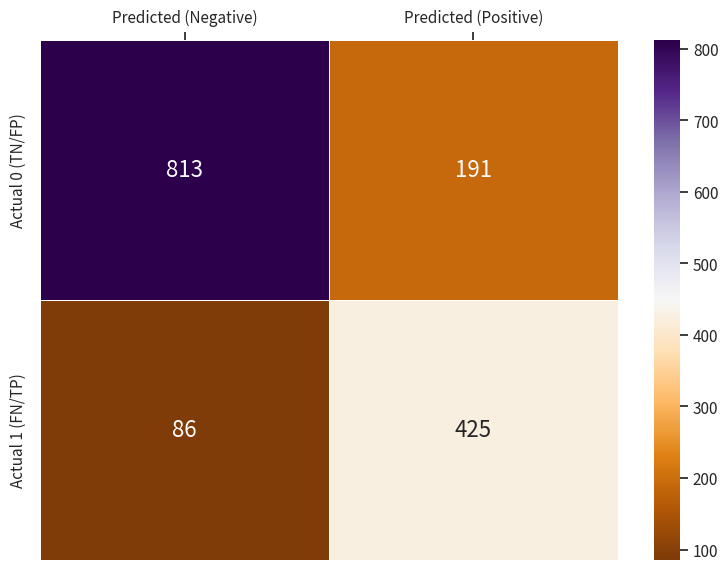

In [38]:
# 1) 그래프 초기화
width_px = 800          # 그래프 가로 크기
height_px = 600         # 그래프 세로 크기
rows = 1                # 그래프 행 수
cols = 1                # 그래프 열 수

figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) heatmap 그리기
# 고쳐진 부분: 혼동행렬 값은 정수이므로 fmt="d" 사용 (0.1f는 소수 표기)
sb.heatmap(
    data=cmdf,
    annot=True,
    fmt="d",
    linewidth=0.5,
    cmap="PuOr"
)

# 3) 그래프 꾸미기
ax.set_xlabel("")
ax.set_ylabel("")
ax.xaxis.tick_top()     # x축의 변수 이름을 상단으로 이동

# 4) 출력
plt.tight_layout()      # 여백 제거
plt.show()              # 그래프 화면 출력
plt.close()             # 그래프 작업 종료


### [5] 정확도 (Accuracy)

- 전체 데이터(FP + FN + TP + TN) 중에서  
  **올바르게 판정한 데이터(TP + TN)의 비율**

\[
\text{Accuracy}
= \frac{\text{정확히 예측한 데이터 건수}}{\text{전체 예측 데이터 건수}}
= \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
\]


In [39]:
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.8171617161716171

### [6] 정밀도 (Precision)
- **양성으로 예측한 데이터 중에서 실제로도 양성인 비율**

\[
\text{Precision}
= \frac{\text{예측과 실제 값이 Positive로 일치하는 것}}
       {\text{Positive로 예측한 것들}}
= \frac{\text{TP}}{\text{TP} + \text{FP}}
\]


- **실제 음성 데이터를 양성으로 잘못 판단(FP)하는 것이 더 큰 문제인 경우에 중요**
  - 예: **스팸 메일 분류 모델**

In [40]:
precision = precision_score(y_test, y_pred)
precision


0.689935064935065

### [7] 재현율 (Recall ,TPR)

- **실제로 양성인 관측치 중에서 양성으로 예측한 비율**
- **TPR(True Positive Rate)** 또는 **민감도(Sensitivity)** 라고도 한다.

\[
\text{TPR (Recall)}
= \frac{\text{예측과 실제 값이 Positive로 일치하는 것}}
       {\text{실제 값이 Positive인 것들}}
= \frac{\text{TP}}{\text{TP} + \text{FN}}
\]

- **실제 양성 데이터를 음성으로 잘못 판단(FN)하는 것이 더 큰 문제인 경우에 중요**
  - 예: **암 판단 모델**

In [41]:
tpr = recall_score(y_test, y_pred)
tpr


0.8317025440313112

### [8] 위양성율,거짓 양성 비율(Fallout, FPR)

FPR(False Positive Rate)이라고도 한다.

\[
\text{FPR}
= \frac{\text{양성으로 예측한 데이터 건수 중 실제 값이 Negative인 것들}}
{\text{실제 값이 Negative인 것들}}
= \frac{\text{FP}}{\text{FP} + \text{TN}}
\]

- 다항로지스틱에서는 사용할 수 없음


In [42]:
fpr = FP/(TN+FP)
fpr

0.1902390438247012

### [9] 특이성 (Specificity) TNR

1에서 위양성률의 값을 뺀 값으로 실제 값 Negative가 정확히 예측되어야 하는 수준을 의미한다.

TNR, True Negative Rate

\[
\text{TNR}
= 1 - \text{FPR}
= 1 - \frac{\text{FP}}{\text{FP} + \text{TN}}
\]

- 다항로지스틱에서는 사용할 수 없음



In [43]:
tnr = 1 - (FP / (TN + FP))
tnr


0.8097609561752988

### [10] F1 Score

- **정밀도(Precision)와 재현율(Recall)을 결합한 지표**
- 두 지표 중 어느 한쪽으로도 치우치지 않을 때 상대적으로 높은 값을 가짐
- **조화 평균(Harmonic Mean)**을 사용하여 계산

\[
\text{F1}
= 2 \times \frac{\text{Precision} \times \text{Recall}}
         {\text{Precision} + \text{Recall}}
\]

- Precision 또는 Recall 중 하나라도 매우 낮으면  
  **F1-score 역시 낮아짐**
- 클래스 불균형 데이터에서 Accuracy보다 더 신뢰도 높은 경우가 많음

In [44]:
f1 = f1_score(y_test, y_pred)
f1


0.7542147293700089

### 상단 지표들 한번에 정리 (동일한 수치)

In [45]:
# ============================================================
# #05 성능 평가 지표
# ============================================================

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

# ------------------------------------------------------------
# [1] 예측값
# ------------------------------------------------------------

# 0,1 중에서 예측 결과를 의미
y_pred = estimator.predict(x_test)

# 위/양성 확률
# 0으로 분류될 확률과 1로 분류될 확률을 의미
# predict_proba는 [0일 확률, 1일 확률] 형태로 반환
y_prob = estimator.predict_proba(x_test)[:, 1]  
# 👉 보통은 1로 분류될 확률만 선택적으로 추출
# 👉 ROC Curve, AUC 계산에 사용


# ------------------------------------------------------------
# [2] 혼동행렬 (Confusion Matrix)
# ------------------------------------------------------------

# (TN, FP)
# (FN, TP)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# TN : 실제 0을 0으로 맞춤
# FP : 실제 0을 1로 잘못 예측 (위양성)
# FN : 실제 1을 0으로 잘못 예측 (위음성)
# TP : 실제 1을 1로 맞춤


# ------------------------------------------------------------
# [3] 정확도 (Accuracy)
# ------------------------------------------------------------
# 전체 데이터 중 올바르게 예측한 비율
# (TP + TN) / (TP + TN + FP + FN)

acc = accuracy_score(y_test, y_pred)


# ------------------------------------------------------------
# [4] 정밀도 (Precision)
# ------------------------------------------------------------
# 양성으로 예측한 것 중 실제 양성인 비율
# TP / (TP + FP)
# FP가 중요한 문제에서 중요 (예: 스팸 분류)

pre = precision_score(y_test, y_pred)


# ------------------------------------------------------------
# [5] 재현율 (Recall, TPR)
# ------------------------------------------------------------
# 실제 양성 중 양성으로 맞춘 비율
# TP / (TP + FN)
# FN이 중요한 문제에서 중요 (예: 질병 진단)

rec = recall_score(y_test, y_pred)


# ------------------------------------------------------------
# [6] F1 Score
# ------------------------------------------------------------
# 정밀도와 재현율의 조화 평균
# 2 * (Precision * Recall) / (Precision + Recall)
# 클래스 불균형 데이터에서 Accuracy보다 더 신뢰도 높음

f1 = f1_score(y_test, y_pred)


# ------------------------------------------------------------
# [7] AUC (ROC Area Under Curve)
# ------------------------------------------------------------
# ROC Curve 아래 면적
# 1에 가까울수록 분류 성능이 좋음
# 0.5는 랜덤 분류 수준

auc = roc_auc_score(y_test, y_prob)


# ------------------------------------------------------------
# [8] 위양성률 (Fallout, FPR)
# ------------------------------------------------------------
# 실제 음성 중 양성으로 잘못 예측한 비율
# FP / (FP + TN)

fpr = fp / (tn + fp)


# ------------------------------------------------------------
# [9] 특이성 (Specificity, TNR)
# ------------------------------------------------------------
# 실제 음성 중 음성으로 정확히 예측한 비율
# TN / (TN + FP)
# = 1 - FPR

tnr = 1 - fpr


# ------------------------------------------------------------
# 결과 출력
# ------------------------------------------------------------

print("Accuracy :", acc)
print("Precision:", pre)
print("Recall   :", rec)
print("F1-score :", f1)
print("AUC      :", auc)
print("Confusion Matrix (tn, fp, fn, tp):", (tn, fp, fn, tp))
print("FPR:", fpr, "TNR:", tnr)

Accuracy : 0.8171617161716171
Precision: 0.689935064935065
Recall   : 0.8317025440313112
F1-score : 0.7542147293700089
AUC      : 0.8984219677064735
Confusion Matrix (tn, fp, fn, tp): (813, 191, 86, 425)
FPR: 0.1902390438247012 TNR: 0.8097609561752988


c:\Users\itwill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 18, 38] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\itwill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 18, 38] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### [11] ROC Curve
재현율(recall, FPR)을 X축으로, 위양성률(fall-out, TPR)을 Y축으로 잡은 그래프

FPR과 TPR 둘 다 양성을 많이 예측할수록 높아지기 때문에 비례한다.  
FPR 대비 TPR이 좋게 나오도록 해야 하는데, 즉  
FPR과 TPR로 그려본 그래프를 ROC curve라면 면적이 클수록 좋으며  
(FPR이 조금만 높아져도 TPR이 큰 폭으로 오름)  
이것을 시각적으로 확인하기 위해 ROC_curve를 이용한다.

- 다항로지스틱에서는 사용할 수 없음


### ✅ ROC Curve & AUC

- **ROC Curve**는  
  - x축: **FPR (False Positive Rate, 위양성률)**  
  - y축: **TPR (True Positive Rate, 재현율 / 민감도)**  
  로 구성된 그래프이다.

- 분류 임계값(threshold)을 변화시키면서  
  **FPR과 TPR의 관계를 시각화**한다.

- FPR과 TPR은 모두  
  → 양성으로 예측하는 비율이 커질수록 증가하는 경향이 있다.

- 좋은 모델일수록  
  - **FPR은 조금만 증가해도**
  - **TPR은 크게 증가**한다.
  → 즉, ROC 곡선이 **좌상단에 가까울수록 우수**

---

### ✅ AUC (Area Under the Curve)

- **ROC 곡선 아래 면적**
- 값의 범위: **0 ~ 1**
  - 0.5 : 랜덤 분류기
  - 1.0 : 완벽한 분류기
- **임계값에 독립적인 성능 지표**
- 클래스 불균형 상황에서도 비교적 안정적





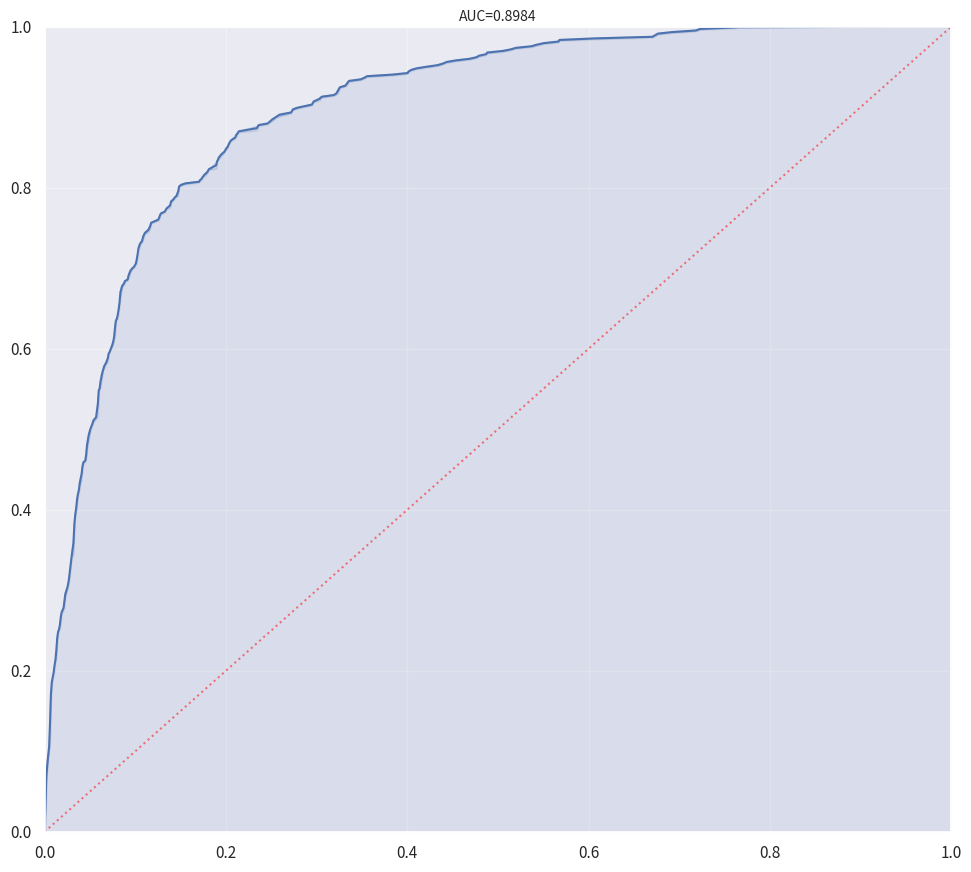

In [46]:
# AUC 계산
auc = roc_auc_score(y_test, y_pred_proba_1)

# ROC Curve 계산
roc_fpr, roc_tpr, thresholds = roc_curve(y_test, y_pred_proba_1)

# 1) 그래프 초기화
width_px = 1000          # 그래프 가로 크기
height_px = 900          # 그래프 세로 크기
rows = 1
cols = 1

figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) LinePlot 그리기
sb.lineplot(x=roc_fpr, y=roc_tpr)
sb.lineplot(x=[0, 1], y=[0, 1], color='red', linestyle=":", alpha=0.5)
plt.fill_between(x=roc_fpr, y1=roc_tpr, alpha=0.1)

# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3)
ax.set_title(f"AUC={auc:.4f}", fontsize=10, pad=4)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# 4) 출력
plt.tight_layout()
plt.show()
plt.close()


### [12] 결과표 구성하기

In [47]:
if hasattr(estimator, "named_steps"):
    classname = estimator.named_steps["model"].__class__.__name__
else:
    classname = estimator.__class__.__name__

score_df = DataFrame(
    {
        "의사결정계수(R2)": [pseudo_r2],
        "정확도(Accuracy)": [accuracy],
        "정밀도(Precision)": [precision],
        "재현율(Recall)": [tpr],
        "위양성율(Fallout)": [fpr],
        "특이성(TNR)": [tnr],
        "F1 Score": [f1],
        "AUC": [auc],
    },
    index=[classname]
)

score_df


,의사결정계수(R2),정확도(Accuracy),정밀도(Precision),재현율(Recall),위양성율(Fallout),특이성(TNR),F1 Score,AUC
LogisticRegression,0.362,0.817,0.690,0.832,0.190,0.810,0.754,0.898


## #07 과적합 판정
### [1] 과적합 판정 표 구성
#### 문제 유형 판별


- dir(estimator) 로 estimator 객체가 가진 기능 리스트 확인 가능

In [48]:
is_classification = (
    hasattr(estimator, "_estimator_type")
    and estimator._estimator_type == "classifier"
)

is_classification


True

#### 클래스 이름

In [49]:
if hasattr(estimator, "named_steps"):
    classname = estimator.named_steps["model"].__class__.__name__
else:
    classname = estimator.__class__.__name__

classname


'LogisticRegression'

#### 평가 기준, 교차 검증수, 학습 곡선 데이터 비율, jobs

In [50]:
scoring = "roc_auc"
cv = 5
train_sizes = np.linspace(0.1, 1.0, 10)
n_jobs = -1

scoring, cv, train_sizes


('roc_auc', 5, array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

#### learning curve 계산

모델 학습할 때는 x_train2 (= x_train_dum)처럼 더미화된 숫자 행렬을 썼는데,
learning_curve에서는 실수로 X=x (원본) 를 넣으면 에러 발생

> 더미화 완료된 전체 X를 만들어서 넣어야함

In [51]:
import numpy as np
from sklearn.model_selection import learning_curve

# (중요) estimator는 전처리+모델이 포함된 best_estimator_ 여야 함
estimator = gs.best_estimator_

train_sizes = np.linspace(0.1, 1.0, 10)

sizes, train_scores, cv_scores = learning_curve(
    estimator=estimator,
    X=x_train,                 # ✅ 파이프라인이면 원본 x_train 넣기
    y=y_train.astype(int),     # ✅ y는 int 권장
    train_sizes=train_sizes,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1,
    shuffle=True,
    random_state=52
)

train_mean = train_scores.mean(axis=1)
cv_mean = cv_scores.mean(axis=1)
cv_std = cv_scores.std(axis=1)

final_train = train_mean[-1]
final_cv = cv_mean[-1]
final_std = cv_std[-1]

gap = final_train - final_cv
var = final_std

print("Final Train AUC:", final_train)
print("Final CV AUC   :", final_cv)
print("Final CV STD   :", final_std)
print("Gap(Train-CV)  :", gap)
print("CV Variability :", var)

Final Train AUC: 0.9025252559495559
Final CV AUC   : 0.88342996466824
Final CV STD   : 0.010612755324154906
Gap(Train-CV)  : 0.01909529128131593
CV Variability : 0.010612755324154906


#### 과적합 판정

In [52]:
# [NEW] 분류는 score를 그대로 사용
train_metric = train_scores   # AUC # AUC는 음수 붙이면 안 된다고 해서 빼봄
cv_metric = cv_scores          # Accuracy

train_mean = train_metric.mean(axis=1)
cv_mean = cv_metric.mean(axis=1)
cv_std = cv_metric.std(axis=1)

final_train = train_mean[-1]
final_cv = cv_mean[-1]
final_std = cv_std[-1]

# [NEW] 분류용 비율 정의 (차이 기반)
gap_ratio = final_train - final_cv
var_ratio = final_std


# [NEW] 분류 판정 로직 (객관적 기준)
if final_train < 0.6 and final_cv < 0.6:
    status = "⚠ 과소적합"
elif gap_ratio > 0.1:
    status = "⚠ 과대적합"
elif gap_ratio <= 0.05 and var_ratio <= 0.05:
    status = "✅ 일반화 양호"
elif var_ratio > 0.1:
    status = "⚠ 데이터 부족"
else:
    status = "⚠ 판단 보류"

metric_name = scoring.upper()

result_df = DataFrame(
    {
        f"Train {metric_name} 평균": [final_train],
        f"CV {metric_name} 평균": [final_cv],
        f"CV {metric_name} 표준편차": [final_std],
        "Train/CV 비율": [gap_ratio],
        "CV 변동성 비율": [var_ratio],
        "판정 결과": [status],
    },
    index=[classname],
)

result_df


,Train ROC_AUC 평균,CV ROC_AUC 평균,CV ROC_AUC 표준편차,Train/CV 비율,CV 변동성 비율,판정 결과
LogisticRegression,0.903,0.883,0.011,0.019,0.011,✅ 일반화 양호


### [2] 학습 곡선

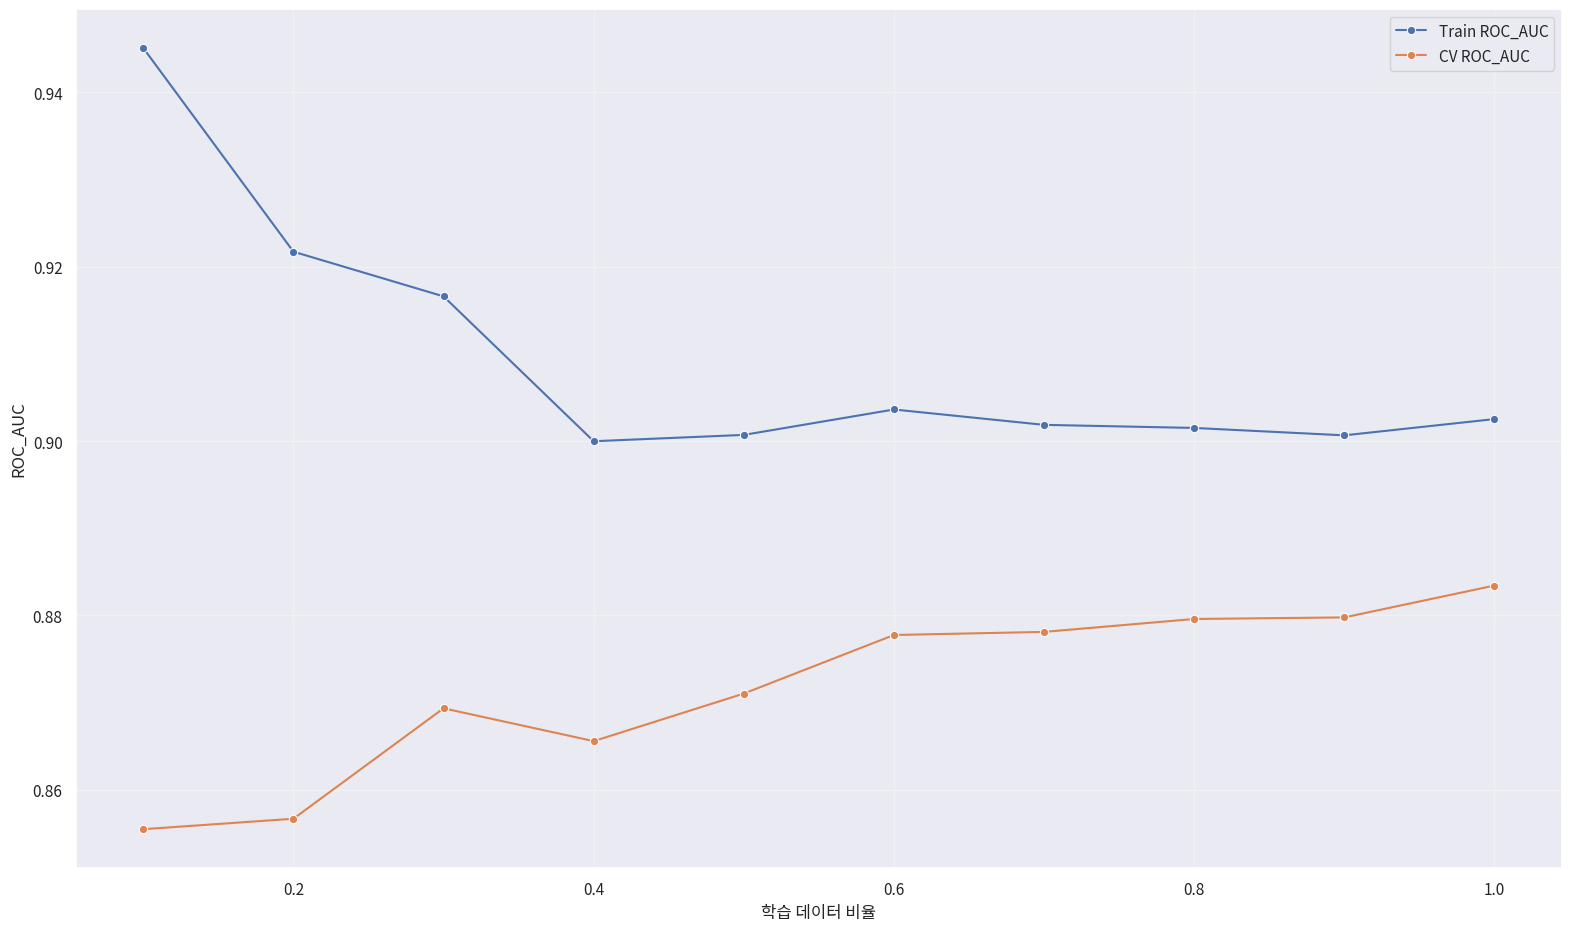

In [53]:
figsize = (1600 / my_dpi, 960 / my_dpi)
fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=my_dpi)

sb.lineplot(
    x=train_sizes,
    y=train_mean,
    marker="o",
    markeredgecolor="#ffffff",
    label=f"Train {metric_name}"
)

sb.lineplot(
    x=train_sizes,
    y=cv_mean,
    marker="o",
    markeredgecolor="#ffffff",
    label=f"CV {metric_name}"
)

ax.set_xlabel("학습 데이터 비율")
ax.set_ylabel(metric_name)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()
